In [4]:
import torch

# Tensors

## Creating tensors

Create a tensor of some size. 

In [22]:
tensor = torch.randn(2,2,3) # torch.randn creates a tensor with normal distributed values
print(tensor)
print(tensor.shape)
print(tensor.size()) # Shape and size() are equivalent
print(tensor[:,0]) # Slicing is similar to np
print(tensor[1,...]) # As in np, ...  menals all other dimensions
print(tensor[:, :, 1:]) # Slicing from a particular value on is the same as numpy

tensor([[[-1.6048, -2.7434,  0.5355],
         [-1.4787, -1.6529,  0.5020]],

        [[-0.7434, -1.3124, -1.6314],
         [ 1.6467, -1.2649, -0.8626]]])
torch.Size([2, 2, 3])
torch.Size([2, 2, 3])
tensor([[-1.6048, -2.7434,  0.5355],
        [-0.7434, -1.3124, -1.6314]])
tensor([[-0.7434, -1.3124, -1.6314],
        [ 1.6467, -1.2649, -0.8626]])
tensor([[[-2.7434,  0.5355],
         [-1.6529,  0.5020]],

        [[-1.3124, -1.6314],
         [-1.2649, -0.8626]]])


One can also initialize a tensor from a list.

In [4]:
tensor = torch.Tensor([[1,2,2],[1,2,3]])
print(tensor)

tensor([[1., 2., 2.],
        [1., 2., 3.]])


If no list is given, it will understand as a random tensor with values that are easily accessible to the memory.

In [5]:
tensor = torch.Tensor(2,3)
print(tensor)

tensor([[1.7684e-34, 0.0000e+00, 1.7688e-34],
        [0.0000e+00, 1.1210e-43, 0.0000e+00]])


The best way to do this is, however, using empty.

In [23]:
torch.empty(2, 3)

tensor([[3.4849e-36, 0.0000e+00, 3.5897e-34],
        [0.0000e+00, 1.1210e-43, 0.0000e+00]])

We can also get tensors from numpy.

In [65]:
import numpy as np
array = np.random.randn(2,3)
print(array)
tensor = torch.from_numpy(array)
print(tensor)

[[-1.57106042  1.22955342 -0.67075843]
 [ 1.52191271 -1.81127509 -0.81743221]]
tensor([[-1.5711,  1.2296, -0.6708],
        [ 1.5219, -1.8113, -0.8174]], dtype=torch.float64)


We can also change the tensor type.

In [27]:
print(tensor.long())
print(tensor.float())

tensor([[ 0,  0,  0],
        [-1, -1, -1]])
tensor([[-0.1025,  0.2419,  0.7315],
        [-1.2969, -1.2234, -1.2335]])


And make some useful tensors

In [50]:
print(torch.arange(1, 5))
print(torch.ones(2,3))
print(torch.zeros(2,3))
print(tensor.fill_(2))

tensor([1, 2, 3, 4])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


## Operations

Most arithmetic operations are naturally defined on tensors.

In [29]:
print(tensor + tensor)
print(torch.add(tensor, tensor))
print(2*tensor) 
print(tensor.mul(2))
print(tensor.mul(torch.Tensor([2]))) # Notice the use of broadcatsting)

tensor([[-0.2050,  0.4839,  1.4630],
        [-2.5939, -2.4469, -2.4671]], dtype=torch.float64)
tensor([[-0.2050,  0.4839,  1.4630],
        [-2.5939, -2.4469, -2.4671]], dtype=torch.float64)
tensor([[-0.2050,  0.4839,  1.4630],
        [-2.5939, -2.4469, -2.4671]], dtype=torch.float64)
tensor([[-0.2050,  0.4839,  1.4630],
        [-2.5939, -2.4469, -2.4671]], dtype=torch.float64)
tensor([[-0.2050,  0.4839,  1.4630],
        [-2.5939, -2.4469, -2.4671]], dtype=torch.float64)


Be careful with matrix multiplication!

In [66]:
print(torch.mm(tensor.view(3,2), tensor))
print(tensor.view(3,2) @ tensor)
print(tensor.view(3,2) * tensor)

tensor([[ 4.3395, -4.1588,  0.0487],
        [ 3.3700, -3.5813, -0.7941],
        [ 1.6016, -0.7465,  1.8831]], dtype=torch.float64)
tensor([[ 4.3395, -4.1588,  0.0487],
        [ 3.3700, -3.5813, -0.7941],
        [ 1.6016, -0.7465,  1.8831]], dtype=torch.float64)


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

We can do in-line operations

In [30]:
tensor.sum(dim = 0)

tensor([-1.3995, -0.9815, -0.5020], dtype=torch.float64)

Reshape is view

In [70]:
tensor_new = tensor.reshape(3,2,1)
print(tensor_new)
print(tensor_new.squeeze()) # Removes a dimension of size 1
print(tensor_new.view(3,2)) 

tensor([[[-1.5711],
         [ 1.2296]],

        [[-0.6708],
         [ 1.5219]],

        [[-1.8113],
         [-0.8174]]], dtype=torch.float64)
tensor([[-1.5711,  1.2296],
        [-0.6708,  1.5219],
        [-1.8113, -0.8174]], dtype=torch.float64)
tensor([[-1.5711,  1.2296],
        [-0.6708,  1.5219],
        [-1.8113, -0.8174]], dtype=torch.float64)


Concatenation is cat.

In [32]:
print(torch.cat([tensor, tensor], dim  = 0))
print(torch.cat([tensor, tensor], dim  = 1))

tensor([[-0.1025,  0.2419,  0.7315],
        [-1.2969, -1.2234, -1.2335],
        [-0.1025,  0.2419,  0.7315],
        [-1.2969, -1.2234, -1.2335]], dtype=torch.float64)
tensor([[-0.1025,  0.2419,  0.7315, -0.1025,  0.2419,  0.7315],
        [-1.2969, -1.2234, -1.2335, -1.2969, -1.2234, -1.2335]],
       dtype=torch.float64)


We can also concatenate in a new dimension.

In [33]:
print(torch.stack([tensor, tensor]))

tensor([[[-0.1025,  0.2419,  0.7315],
         [-1.2969, -1.2234, -1.2335]],

        [[-0.1025,  0.2419,  0.7315],
         [-1.2969, -1.2234, -1.2335]]], dtype=torch.float64)


## Enabling gradient

For backpropagation, it is often useful to have the tensor with requiring gradient. This is done by

In [5]:
tensor = torch.ones(2, requires_grad=True)
print(tensor)
y =  (tensor + 2) * tensor + 3
print(y)
z = y.mean() # For taking the gradient, we need a scalar
print(z)
z.backward() # Initializes computation of gradient
print(tensor.grad) # This gives the gradient of z with respect to x

tensor([1., 1.], requires_grad=True)
tensor([6., 6.], grad_fn=<AddBackward0>)
tensor(6., grad_fn=<MeanBackward0>)
tensor([2., 2.])


In [6]:
x =  torch.ones(2, requires_grad=True)
y = 2*x[0] + 3*x[1]
y.backward()
print(x.grad)

tensor([2., 3.])


# Perceptron

Here, we will see an early implementation of the perceptron architecture.
First, we generate the data.

In [81]:
import numpy as np
def get_toy_data(n_samples):
    x0 = np.random.randn(n_samples, 2) - 1
    x1 = np.random.randn(n_samples, 2) + 1
    X = np.vstack((x0, x1))
    y = np.array([0]*n_samples + [1]*n_samples)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1) # View transforms data to have one column of targets, same as sklearn
                                                                                                # It needs to be a float here

We can see the data

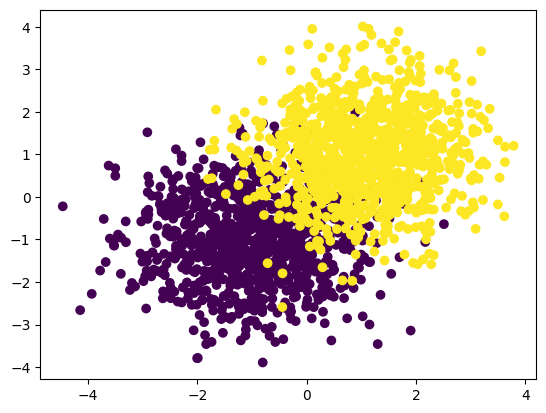

In [82]:
import matplotlib.pyplot as plt
X_train, y_train = get_toy_data(n_samples = 1000)
plt.scatter(X_train.detach().numpy()[:,0], X_train.detach().numpy()[:,1], c = y_train.detach().numpy())
plt.show()

Now we define the model.

In [83]:
import torch.nn as nn
class Perceptron(nn.Module):
    '''
    Perceptron as a class. In general, we like to have models as classes in Torch.
    '''
    def __init__(self, input_size):
        super().__init__() # Recall that we need always to initialize the superclass
        self.fc1 = nn.Linear(input_size, 1)
        self.input_size = input_size
    
    def forward(self, x_in):
        if x_in.shape[1] != self.input_size:
            raise Exception("Input dimension of the object must be equal to the model's expected diemension!") 
        return torch.sigmoid(self.fc1(x_in))

And the parameters of training

In [84]:
input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim)
bce_loss = nn.BCELoss()
optimizer = torch.optim.Adam(params = perceptron.parameters(), lr = lr)

Now we train

In [85]:
n_epochs = 10
batch_size = 64
n_batches = 100*batch_size
loss = torch.Tensor([np.inf]) # Start the loss for printing

for epoch in range(n_epochs):
    print('Epoch: ', epoch)
    print('Loss: ', loss.item())
    perceptron.train() # Allows for adjusting parameters
    for batch in range(n_batches):
        # 0. Prepare data
        X_train, y_train = get_toy_data(batch_size)

        # 1. Zero the gradient
        perceptron.zero_grad()

        # 2. Prediction
        y_pred = perceptron(X_train)

        # 3. Compute loss
        loss = bce_loss(y_pred, y_train)

        # 4. Backpropagate
        loss.backward()
        
        # 5. Optimize
        optimizer.step()

    # Evaluation part, we don't want paramereres to change
    perceptron.eval()
    X_val, y_val = get_toy_data(batch_size)
    y_pred = perceptron(X_val)
    loss = bce_loss(y_pred, y_val)

Epoch:  0
Loss:  inf
Epoch:  1
Loss:  0.22870929539203644
Epoch:  2
Loss:  0.2837589681148529
Epoch:  3
Loss:  0.19456075131893158
Epoch:  4
Loss:  0.13616006076335907
Epoch:  5
Loss:  0.15492823719978333
Epoch:  6
Loss:  0.1745254248380661
Epoch:  7
Loss:  0.15265808999538422
Epoch:  8
Loss:  0.21037839353084564
Epoch:  9
Loss:  0.13031336665153503


We can use it now to evaluate

In [86]:
perceptron.eval()
X_test, y_test = get_toy_data(batch_size)
y_pred = perceptron(X_test)
print(bce_loss(y_pred, y_test).item())

0.1934664398431778


# Multilayer perceptron

Now we implement a multilayer NN. To make things more interesting, we do a quadradtic model.

In [132]:
def get_toy_data2(n_samples):
    t = np.linspace(-1,1,n_samples)
    y = np.random.randn(n_samples)
    x = np.hstack((t.reshape(-1,1), (t**2+y).reshape(-1,1)))
    y = (y>=0)
    return torch.tensor(x, dtype = torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1)

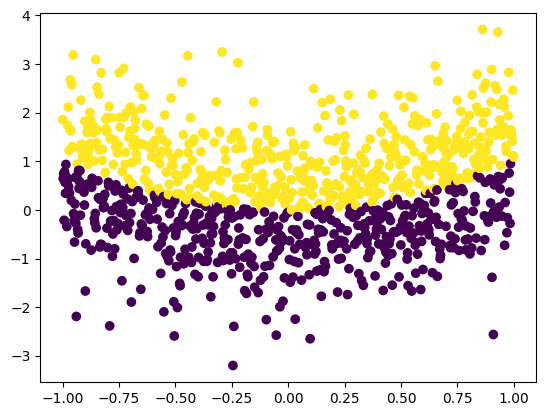

In [134]:
import matplotlib.pyplot as plt
X_train, y_train = get_toy_data2(n_samples = 1000)
plt.scatter(X_train.detach().numpy()[:,0], X_train.detach().numpy()[:,1], c = y_train.detach().numpy())
plt.show()

In [135]:
import torch.nn as nn
import torch.nn.functional as F
class MLP(nn.Module):
    '''
    Perceptron as a class. In general, we like to have models as classes in Torch.
    '''
    def __init__(self, input_size, hidden_dimension):
        super().__init__() 
        self.fc1 = nn.Linear(input_size, hidden_dimension)
        self.fc2 = nn.Linear(hidden_dimension, 1)
        self.input_size = input_size
    
    def forward(self, x_in):
        if x_in.shape[1] != self.input_size:
            raise Exception("Input dimension of the object must be equal to the model's expected diemension!") 
        intermediate = F.relu(self.fc1(x_in))
        return torch.sigmoid(self.fc2(intermediate))

Now we train

In [149]:
hidden_dimension = 5
lr = 0.01
classifier = MLP(input_dim, hidden_dimension)
n_epochs = 10
bce_loss = nn.BCELoss()
optimizer = torch.optim.Adam(params = classifier.parameters(), lr = lr)

for epoch in range(n_epochs):
    classifier.train() # Allows for adjusting parameters
    epoch_loss = 0.
    for batch in range(n_batches):
        # 0. Prepare data
        X_train, y_train = get_toy_data2(batch_size)

        # 1. Zero the gradient
        classifier.zero_grad()

        # 2. Prediction
        y_pred = classifier(X_train)

        # 3. Compute loss
        train_loss = bce_loss(y_pred, y_train)
        epoch_loss += train_loss.item()

        # 4. Backpropagate
        train_loss.backward()
        
        # 5. Optimize
        optimizer.step()

    # Evaluation part, we don't want paramereres to change
    classifier.eval()
    X_val, y_val = get_toy_data2(batch_size)
    y_pred = classifier(X_val)
    loss = bce_loss(y_pred, y_val)

    print('Epoch: ', epoch)
    print('Train loss', epoch_loss)
    print('Validation loss: ', loss.item())

Epoch:  0
Train loss 277.4374156042031
Validation loss:  0.04967775568366051
Epoch:  1
Train loss 114.10222948481169
Validation loss:  0.010913750156760216
Epoch:  2
Train loss 96.14703179053572
Validation loss:  0.02588004246354103
Epoch:  3
Train loss 86.3833239299364
Validation loss:  0.014038888737559319
Epoch:  4
Train loss 80.16730321310698
Validation loss:  0.002168565522879362
Epoch:  5
Train loss 79.54251228129618
Validation loss:  0.0025485195219516754
Epoch:  6
Train loss 74.79347077767372
Validation loss:  0.0022812297102063894
Epoch:  7
Train loss 73.50164055975492
Validation loss:  0.007446793839335442
Epoch:  8
Train loss 70.54771095758026
Validation loss:  0.02983587607741356
Epoch:  9
Train loss 71.43431900735717
Validation loss:  0.010931063443422318
